In [1]:
import rasterio
import pathlib
import passion
import numpy as np
import matplotlib.pyplot as plt
import rasterio.merge
import rasterio.plot

In [2]:
satellite_path = pathlib.Path('../../workflow/output/skopje-z19/satellite')

Opening 0 image: ../../workflow/output/skopje-z19/satellite/42D00M09142SNORTH_21D22M40297SEAST_19L.tif...
Boundaries: ((75078108.0, 49823370.0), (75080108.0, 49821896.0))
Zoom level: 19


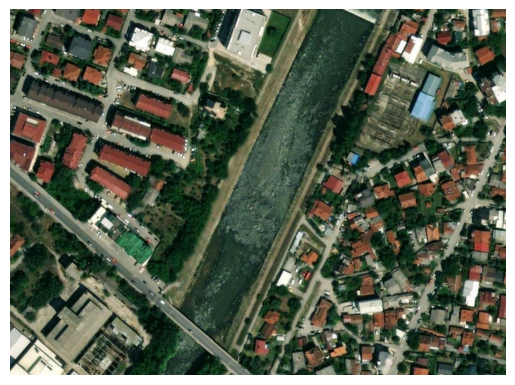

Opening 1 image: ../../workflow/output/skopje-z19/satellite/42D00M09142SNORTH_21D22M59609SEAST_19L.tif...
Boundaries: ((75080108.0, 49823370.0), (75082108.0, 49821896.0))
Zoom level: 19


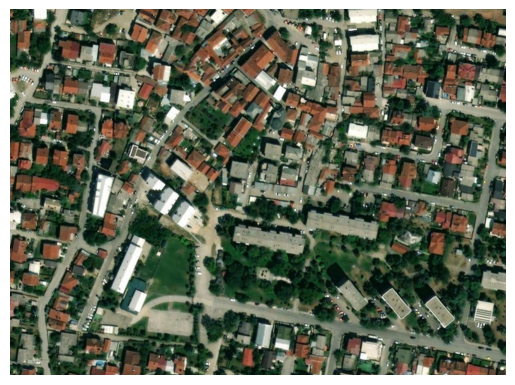

Opening 2 image: ../../workflow/output/skopje-z19/satellite/42D00M19726SNORTH_21D22M40297SEAST_19L.tif...
Boundaries: ((75078108.0, 49821895.0), (75080108.0, 49820421.0))
Zoom level: 19


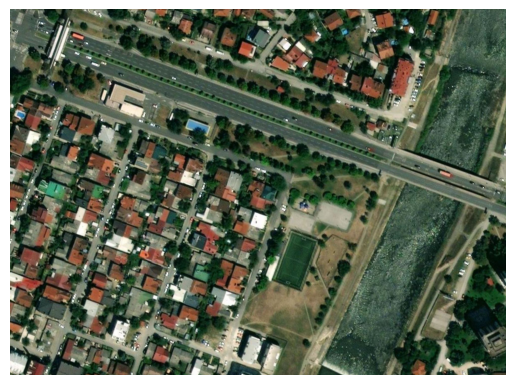

Opening 3 image: ../../workflow/output/skopje-z19/satellite/42D00M19726SNORTH_21D22M59609SEAST_19L.tif...
Boundaries: ((75080108.0, 49821895.0), (75082108.0, 49820421.0))
Zoom level: 19


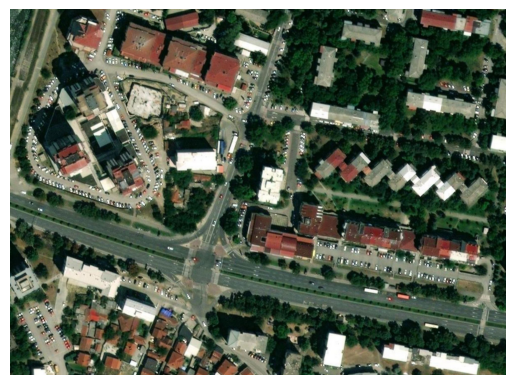

In [3]:
geotiffs = []

for i, path in enumerate(satellite_path.glob('*.tif')):
    print(f'Opening {i} image: {path}...')
    
    src = rasterio.open(path)
    bounds = src.bounds
    bbox = (bounds.left, bounds.top), (bounds.right, bounds.bottom)
    zoom = src.tags().get('zoom_level')
    
    print(f'Boundaries: {bbox}')
    print(f'Zoom level: {zoom}')
    
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)
    
    rgb = np.dstack((r,g,b))
    
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()
    
    geotiffs.append(src)

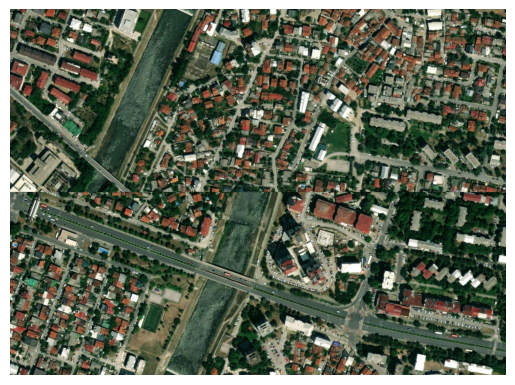

<AxesSubplot:>

In [4]:
merged = rasterio.merge.merge(geotiffs)

plt.axis('off')
rasterio.plot.show(merged[0])